# Sea Surface Temperature Time-Series Analysis

Info: Sea surface temperature measured in celcius. 2 sources - Reynolds Optimum Interpolation Sea Surface Temperature (ROISST), Hadley Centre Sea Ice and Sea Surface Temperature (HadSST).

Insight: As surface water warms, the stratification, or layering, becomes even more pronounced, suppressing mixing even further. As a result, nutrient transfer from deeper water to surface waters declines, and so does phytoplankton productivity.

In [11]:
import pandas as pd

#### Reading & Cleaning datasets

In [12]:
# Creating a dictionary for all geo-points with their sst data by roi & had
geopoint = {'0': {'sst_roi': pd.read_csv('../Nauplius data (raw)/point 0/dataRSST_ROI2sst.csv'),
                  'sst_had': pd.read_csv('../Nauplius data (raw)/point 0/dataRSST_HadISST.csv')},
            'A': {'sst_roi': pd.read_csv('../Nauplius data (raw)/point A/dataRSST_ROI2sst.csv'),
                  'sst_had': pd.read_csv('..//Nauplius data (raw)/point A/dataRSST_HadISST.csv')},
            'B': {'sst_roi': pd.read_csv('../Nauplius data (raw)/point B/dataRSST_ROI2sst.csv'),
                  'sst_had': pd.read_csv('../Nauplius data (raw)/point B/dataRSST_HadISST.csv')}}
# Cleaning all datasets
for point in geopoint:
    # Accessing dataframes
    df_roi = geopoint[point]['sst_roi']
    df_had = geopoint[point]['sst_had']
    # Dropping empty unnamed NaN col
    df_roi.drop(columns=df_roi.columns[-1], inplace=True)
    df_had.drop(columns=df_had.columns[-1], inplace=True)
    # Renaming the sea surface temp
    df_roi.rename(columns={'TEMP= Reynolds OI-SST-v2 Temperature (C)': 'Reynolds Temp (C)'}, inplace=True)
    df_had.rename(columns={'HSST= HadISST Temperature (C)': 'Hadley Temp (C)'}, inplace=True)
    # Filter the rows for the year 2000 onwards
    df_roi['DATE-YMD'] = pd.to_datetime(df_roi['DATE-YMD'], format='%Y-%m-%d %H:%M:%S')
    df_roi = df_roi[df_roi['DATE-YMD'].dt.year >= 2000]
    df_had['DATE-YMD'] = pd.to_datetime(df_had['DATE-YMD'], format='%Y-%m-%d %H:%M:%S')
    df_had = df_had[df_had['DATE-YMD'].dt.year >= 2000]
    
# Display 2 random datasets
display(geopoint['A']['sst_had'], geopoint['B']['sst_roi'])

,DATE-YMD,Hadley Temp (C)
0,1900-01-15,20.03
1,1900-02-15,19.20
2,1900-03-15,19.28
3,1900-04-15,18.74
4,1900-05-15,18.68
...,...,...
1459,2021-08-15,25.24
1460,2021-09-15,24.89
1461,2021-10-15,25.81
1462,2021-11-15,22.65


,DATE-YMD,Reynolds Temp (C)
0,1982-01-15,19.312
1,1982-02-15,17.630
2,1982-03-15,19.088
3,1982-04-15,20.358
4,1982-05-15,18.779
...,...,...
475,2021-08-15,25.559
476,2021-09-15,26.451
477,2021-10-15,24.689
478,2021-11-15,22.995


#### Comparison of all datasets: 1 graph per geopoint (A,B,C) and 2 lineplots per graph (ROI, HAD)

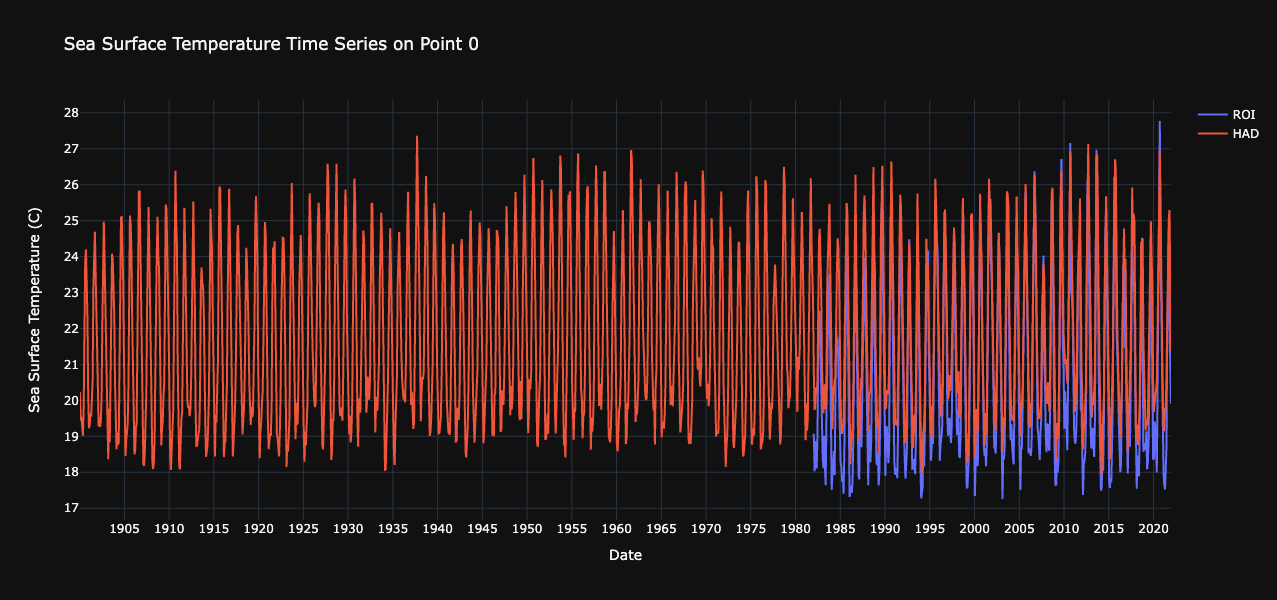

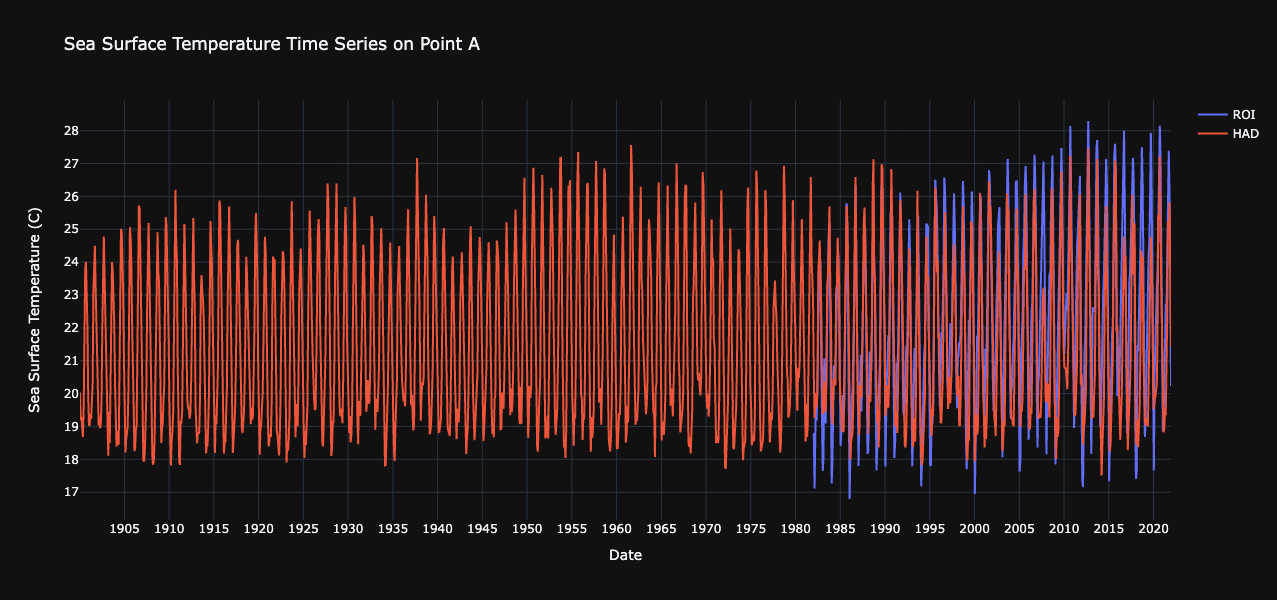

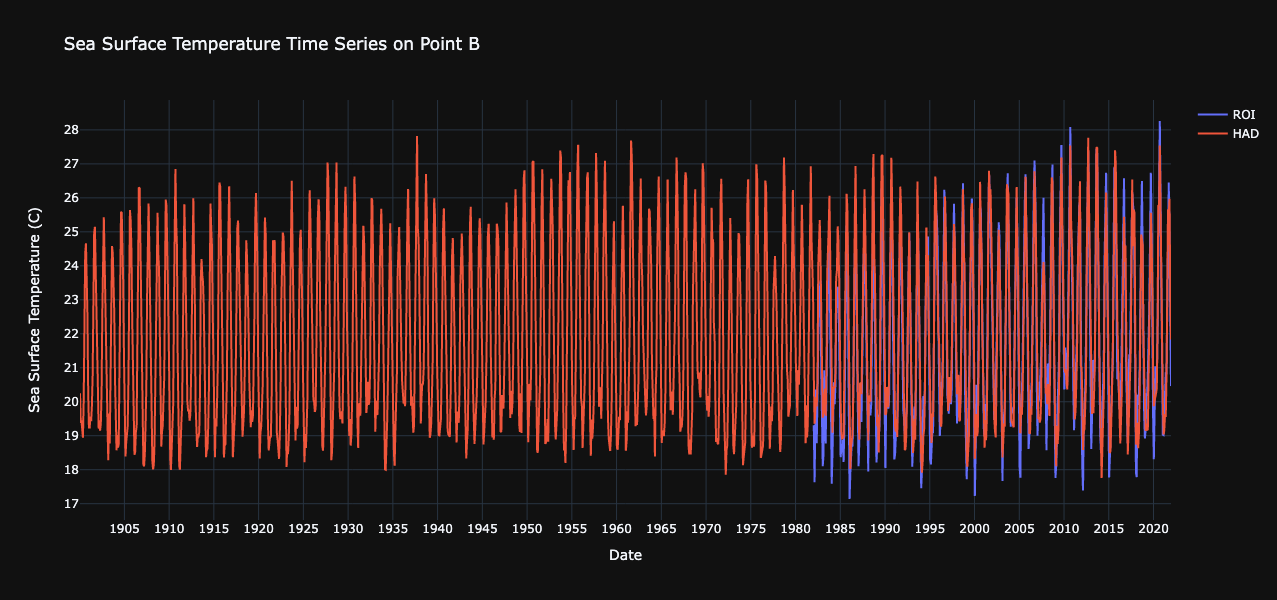

In [15]:
import plotly.graph_objs as go
import math

# Loop through each geopoint
for point in geopoint:
    df_roi = geopoint[point]['sst_roi']
    df_had = geopoint[point]['sst_had']
    # create traces for each dataset
    trace1 = go.Scatter(x=df_roi['DATE-YMD'], y=df_roi['Reynolds Temp (C)'], mode='lines', name='ROI')
    trace2 = go.Scatter(x=df_had['DATE-YMD'], y=df_had['Hadley Temp (C)'], mode='lines', name='HAD')
    # create layout for the plot
    layout = go.Layout(title=f'Sea Surface Temperature Time Series on Point {point}',
                       xaxis=dict(title='Date', dtick='M60'),
                       yaxis=dict(title='Sea Surface Temperature (C)', dtick=1),
                       height = 600, width=1200,
                       template='plotly_dark')
    # create figure object and plot the traces
    fig = go.Figure(data=[trace1, trace2], layout=layout)
    fig.show()